In [200]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [201]:
df_train = pd.read_csv('_Titanic_train.csv')
df_test = pd.read_csv('_Titanic_test.csv')

## Preprocessing

### Training data

In [202]:
df_train = df_train[df_train.isna().any(axis=1)]
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [203]:
df_train['Age'].fillna(df_train['Age'].median(), inplace=True)  #fill n/a age with mean
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,26.0,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,26.0,1,2,W./C. 6607,23.4500,NaN,S


Sex column values:
Sex
male      482
female    226
Name: count, dtype: int64

Different titles found on the dataset:
10 : ['Col', 'Don', 'Dr', 'Jonkheer', 'Master', 'Miss', 'Mr', 'Mrs', 'Ms', 'Rev']

Title column values. Males and females are the same that for the "Sex" column:
Title
Mr        449
Miss      139
Mrs        87
Master     33
Name: count, dtype: int64


<Axes: xlabel='Title'>

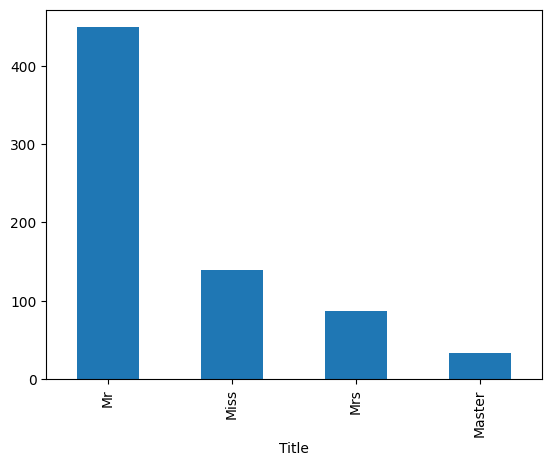

In [204]:
# extract titles from names
# Print out the distribution of males and females
print('Sex column values:')
print(df_train.Sex.value_counts())
print()

# Functions that returns the title from a name. All the name in the dataset has the format "Surname, Title. Name"
def get_title(name):
    if '.' in name:
        return name.split(',')[1].split('.')[0].strip()
    else:
        return 'Unknown'

# A list with the all the different titles
titles = sorted(set([x for x in df_train.Name.map(lambda x: get_title(x))]))
print('Different titles found on the dataset:')
print(len(titles), ':', titles)
print()

# Normalize the titles, returning 'Mr', 'Master', 'Miss' or 'Mrs'
def replace_titles(x):
    title = x['Title']
    if title in ['Capt', 'Col', 'Don', 'Jonkheer', 'Major', 'Rev', 'Sir']:
        return 'Mr'
    elif title in ['the Countess', 'Mme', 'Lady', 'Dona']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title =='Dr':
        if x['Sex']=='male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title

# Lets create a new column for the titles
df_train['Title'] = df_train['Name'].map(lambda x: get_title(x))
# train.Title.value_counts()
# train.Title.value_counts().plot(kind='bar')

# And replace the titles, so the are normalized to 'Mr', 'Miss' and 'Mrs'
df_train['Title'] = df_train.apply(replace_titles, axis=1)

# Check that the number of Mr, Mrs and Miss are the same that 'male' and 'female'
print('Title column values. Males and females are the same that for the "Sex" column:')
print(df_train.Title.value_counts())

# Plot the result
df_train.Title.value_counts().plot(kind='bar')

In [205]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
5,6,0,3,"Moran, Mr. James",male,26.0,0,0,330877,8.4583,NaN,Q,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master


In [206]:
#convert columns/table
male = pd.get_dummies(df_train['Sex'],drop_first=True) #convert male/female to 0/1. Check video why drop_first=True
embark = pd.get_dummies(df_train['Embarked'],drop_first=True) #same conversion for embark
pcla = pd.get_dummies(df_train['Pclass'], drop_first=True) #make numbers 1,2,3 categories - its different
salutation = pd.get_dummies(df_train['Title'], drop_first=True) #the same with title

# visualise the changes, update table
df_train = pd.concat([df_train,pcla,male,embark,salutation],axis=1)  # add those converted columns
df_train.drop(['Sex','Embarked','Pclass','Cabin','Title','Ticket','Name'],axis=1,inplace=True) #drop unnecesary cols
df_train.head()


,PassengerId,Survived,Age,SibSp,Parch,Fare,2,3,male,Q,S,Miss,Mr,Mrs
0,1,0,22.0,1,0,7.2500,False,True,True,False,True,False,True,False
2,3,1,26.0,0,0,7.9250,False,True,False,False,True,True,False,False
4,5,0,35.0,0,0,8.0500,False,True,True,False,True,False,True,False
5,6,0,26.0,0,0,8.4583,False,True,True,True,False,False,True,False
7,8,0,2.0,3,1,21.0750,False,True,True,False,True,False,False,False


In [207]:
df_train.to_csv('Titanic_train_preprocessed.csv', index=False)

### Test data

In [208]:
df_test['Age'].fillna(df_test['Age'].median(), inplace=True)
# df_test['Fare'].fillna(df_test['Fare'].mean(), inplace=True) - simple fare - result ~35$ price

# !!!!try simpler!!! more accurate fare mean estimation based on Pclass, parch and number of siblings - result ~8$ price
median_fare = df_test.groupby(['Pclass', 'Parch', 'SibSp']).Fare.median()[3][0][0]
df_test['Fare'] = df_test['Fare'].fillna(median_fare)

Sex column values:
Sex
male      266
female    152
Name: count, dtype: int64

Different titles found on the dataset:
9 : ['Col', 'Dona', 'Dr', 'Master', 'Miss', 'Mr', 'Mrs', 'Ms', 'Rev']

Title column values. Males and females are the same that for the "Sex" column:
Title
Mr        245
Miss       79
Mrs        73
Master     21
Name: count, dtype: int64


<Axes: xlabel='Title'>

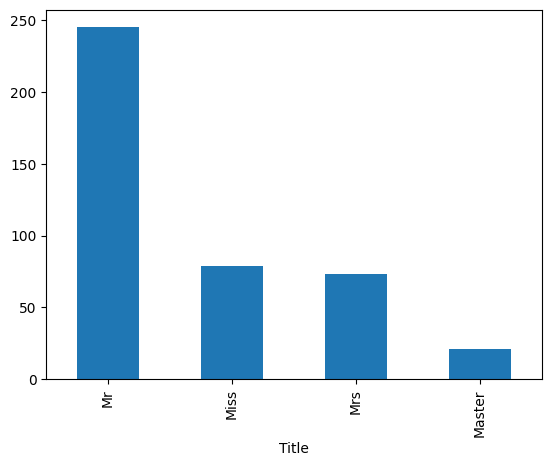

In [209]:
# extract titles from names
# Print out the distribution of males and females
print('Sex column values:')
print(df_test.Sex.value_counts())
print()

# Functions that returns the title from a name. All the name in the dataset has the format "Surname, Title. Name"
def get_title(name):
    if '.' in name:
        return name.split(',')[1].split('.')[0].strip()
    else:
        return 'Unknown'

# A list with the all the different titles
titles = sorted(set([x for x in df_test.Name.map(lambda x: get_title(x))]))
print('Different titles found on the dataset:')
print(len(titles), ':', titles)
print()

# Normalize the titles, returning 'Mr', 'Master', 'Miss' or 'Mrs'
def replace_titles(x):
    title = x['Title']
    if title in ['Capt', 'Col', 'Don', 'Jonkheer', 'Major', 'Rev', 'Sir']:
        return 'Mr'
    elif title in ['the Countess', 'Mme', 'Lady', 'Dona']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title =='Dr':
        if x['Sex']=='male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title

# Lets create a new column for the titles
df_test['Title'] = df_test['Name'].map(lambda x: get_title(x))
# train.Title.value_counts()
# train.Title.value_counts().plot(kind='bar')

# And replace the titles, so the are normalized to 'Mr', 'Miss' and 'Mrs'
df_test['Title'] = df_test.apply(replace_titles, axis=1)

# Check that the number of Mr, Mrs and Miss are the same that 'male' and 'female'
print('Title column values. Males and females are the same that for the "Sex" column:')
print(df_test.Title.value_counts())

# Plot the result
df_test.Title.value_counts().plot(kind='bar')

In [210]:
#convert columns/table
male = pd.get_dummies(df_test['Sex'],drop_first=True) #convert male/female to 0/1. Check video why drop_first=True
embark = pd.get_dummies(df_test['Embarked'],drop_first=True) #same conversion for embark
pcla = pd.get_dummies(df_test['Pclass'], drop_first=True) #make numbers 1,2,3 categories - its different
salutation = pd.get_dummies(df_test['Title'], drop_first=True) #the same with title

# visualise the changes, update table
df_test = pd.concat([df_test,pcla,male,embark,salutation],axis=1)  # add those converted columns
df_test.drop(['Sex','Embarked','Pclass','Cabin','Title','Ticket','Name'],axis=1,inplace=True) # drop unnecesary columns
df_test.head()

,PassengerId,Age,SibSp,Parch,Fare,2,3,male,Q,S,Miss,Mr,Mrs
0,892,34.5,0,0,7.8292,False,True,True,True,False,False,True,False
1,893,47.0,1,0,7.0000,False,True,False,False,True,False,False,True
2,894,62.0,0,0,9.6875,True,False,True,True,False,False,True,False
3,895,27.0,0,0,8.6625,False,True,True,False,True,False,True,False
4,896,22.0,1,1,12.2875,False,True,False,False,True,False,False,True


In [211]:
df_train.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,2,3,male,Q,S,Miss,Mr,Mrs
0,1,0,22.0,1,0,7.2500,False,True,True,False,True,False,True,False
2,3,1,26.0,0,0,7.9250,False,True,False,False,True,True,False,False
4,5,0,35.0,0,0,8.0500,False,True,True,False,True,False,True,False
5,6,0,26.0,0,0,8.4583,False,True,True,True,False,False,True,False
7,8,0,2.0,3,1,21.0750,False,True,True,False,True,False,False,False


In [212]:
df_test.to_csv('Titanic_test_preprocessed.csv', index=False)

## Train the data

In [189]:
df_train = pd.read_csv('Titanic_train_preprocessed_scaled.csv')
df_test = pd.read_csv('Titanic_test_preprocessed_scaled.csv')

In [217]:
# df_train = pd.read_csv('../titanic_train_preprocessed3.csv')
# df_test = pd.read_csv('../titanic_test_preprocessed3.csv')

In [218]:
X_train = df_train.drop('Survived',axis=1)
y_train = df_train['Survived']

In [219]:
from sklearn.ensemble import RandomForestClassifier
# find best params
param_grid = { "criterion" : ["gini", "entropy"], "max_features" : ["sqrt", "log2"], "min_samples_leaf" : [1, 2, 3, 5, 7, 10, 15, 27], "min_samples_split" : [1, 2, 3, 5, 7, 10, 15, 21, 28, 37, 50], "n_estimators": [1, 3, 7, 10, 25, 50, 100, 500]}
from sklearn.model_selection import GridSearchCV, cross_val_score
rfc = RandomForestClassifier(oob_score=True, random_state=42, n_jobs=-1)
clf = GridSearchCV(estimator=rfc, param_grid=param_grid, n_jobs=-1)
clf.fit(X_train, y_train)

KeyboardInterrupt: 

In [173]:
clf.best_estimator_

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [174]:
clf.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [175]:
clf.best_score_

AttributeError: 'GridSearchCV' object has no attribute 'best_score_'

In [220]:
rfc = RandomForestClassifier(criterion='entropy', min_samples_leaf=2,
                       min_samples_split=10, n_estimators=25, n_jobs=-1,
                       oob_score=True, random_state=42, verbose=1)
rfc.fit(X_train.values,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.0s finished


RandomForestClassifier(criterion='entropy', min_samples_leaf=2,
                       min_samples_split=10, n_estimators=25, n_jobs=-1,
                       oob_score=True, random_state=42, verbose=1)

In [221]:
rfc.fit(X_train.values,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.0s finished


RandomForestClassifier(criterion='entropy', min_samples_leaf=2,
                       min_samples_split=10, n_estimators=25, n_jobs=-1,
                       oob_score=True, random_state=42, verbose=1)

In [222]:
#df_test = pd.read_csv('Titanic_test_preprocessed.csv')
#df_test.drop(['Unnamed: 0'],axis=1,inplace=True) 
df_test.columns

Index(['Age', 'SibSp', 'Parch', 'Fare', 'Deck', 'Relatives', 'Age_Class',
       'Female', 'Male', 'Master', 'Miss', 'Mr', 'Mrs', 'Class 1', 'Class 2',
       'Class 3', 'EmbarkC', 'EmbarkQ', 'EmbarkS'],
      dtype='object')

In [223]:
X_test=df_test

predictions = rfc.predict(X_test.values)
#predictions = logmodel.predict(X_test)
#predictions = ann.predict(X_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 out of  25 | elapsed:    0.0s finished


In [224]:
predictions

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [225]:
#rfc_pred_data = pd.DataFrame(rfc_predict)
#df_test = pd.concat([df_test,rfc_pred_data],axis=1) 
#df_test.head()

pred_data = pd.DataFrame(predictions)
df_test = pd.read_csv('_Titanic_test.csv')
df_test = pd.concat([df_test,pred_data],axis=1) 
df_test.columns

Index(['PassengerId',      'Pclass',        'Name',         'Sex',
               'Age',       'SibSp',       'Parch',      'Ticket',
              'Fare',       'Cabin',    'Embarked',             0],
      dtype='object')

In [226]:
df_test.drop(['Pclass',        'Name',         'Sex',
               'Age',       'SibSp',       'Parch',      'Ticket',
              'Fare',       'Cabin',    'Embarked'],axis=1,inplace=True) 
df_test.head()

,PassengerId,0
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [227]:
df_test = df_test.rename(columns = {0:'Survived'})
df_test.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [228]:
#submission_df = pd.DataFrame(columns=['PassengerId', 'Survived'])
#submission_df['PassengerId'] = df_test['PassengerId']
#submission_df['Survived'] = pred_data.values
#submission_df.to_csv('submissions.csv', header=True, index=False)
df_test.to_csv('submission.csv', index=False)
#submission_df.head()